In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from math import sqrt

In [2]:
data = pd.read_csv('BTC2019-2024.csv')
close_prices = data['Close']

In [3]:
# Chia dữ liệu thành tập train và test theo tỉ lệ 8:2
train_size = int(len(close_prices) * 0.8)
train, test = close_prices[:train_size], close_prices[train_size:]

In [4]:
# Xây dựng mô hình Holt-Winters trên tập train
model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=365).fit()

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [5]:
# Dự báo cho tập test
predict_test = model.predict(start=test.index[0], end=test.index[-1])

In [6]:
# Tính toán RMSE, MAPE, MSE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
rmse_test = sqrt(mean_squared_error(test, predict_test))
mape_test = mean_absolute_percentage_error(test, predict_test)
mse_test = mean_squared_error(test, predict_test)

In [7]:
print("RMSE:", rmse_test)
print("MAPE:", mape_test)
print("MSE:", mse_test)

RMSE: 19494.10431792753
MAPE: 53.55607941133803
MSE: 380020103.1582408


Giá trị RMSE khoảng 19494.1 cho thấy mức độ sai số trung bình của mô hình là khá cao. So với các tỷ lệ train-test 6:4 và 7:3, RMSE ở đây cao hơn nhiều, cho thấy mô hình không dự báo tốt khi dữ liệu được chia theo tỷ lệ 8:2.

Với giá trị MAPE khoảng 53.56%, mô hình dự báo có sai số trung bình là khoảng 53.56% so với giá trị thực. Đây là một mức độ sai số lớn, cho thấy mô hình không dự báo tốt và không đáng tin cậy khi sử dụng tỷ lệ train-test 8:2.

MSE là trung bình bình phương sai số. Giá trị MSE khoảng 380020103.16 cũng là một con số lớn, cho thấy mô hình không dự báo tốt và có nhiều sai số lớn.

### Dự báo

#### Dự báo 30 ngày

In [8]:
# Dự báo cho 30 ngày tiếp theo
predict_30_days = model.predict(start=test.index[-1] + 1, end=test.index[-1] + 1 + 30)
print(predict_30_days)

1815    26716.046606
1816    28765.725234
1817    28869.195347
1818    29536.349820
1819    27959.131353
1820    25090.879457
1821    25336.023683
1822    23731.405317
1823    23294.196629
1824    23120.297865
1825    22516.341997
1826    24705.265883
1827    24193.784472
1828    25191.232714
1829    24145.537025
1830    24448.334031
1831    24420.679827
1832    25416.580234
1833    25490.073505
1834    26648.755898
1835    27196.475122
1836    28057.932947
1837    26316.054189
1838    28531.370999
1839    27343.242883
1840    25706.072544
1841    25927.399459
1842    27025.574601
1843    26486.885084
1844    27167.972548
1845    27115.085810
dtype: float64


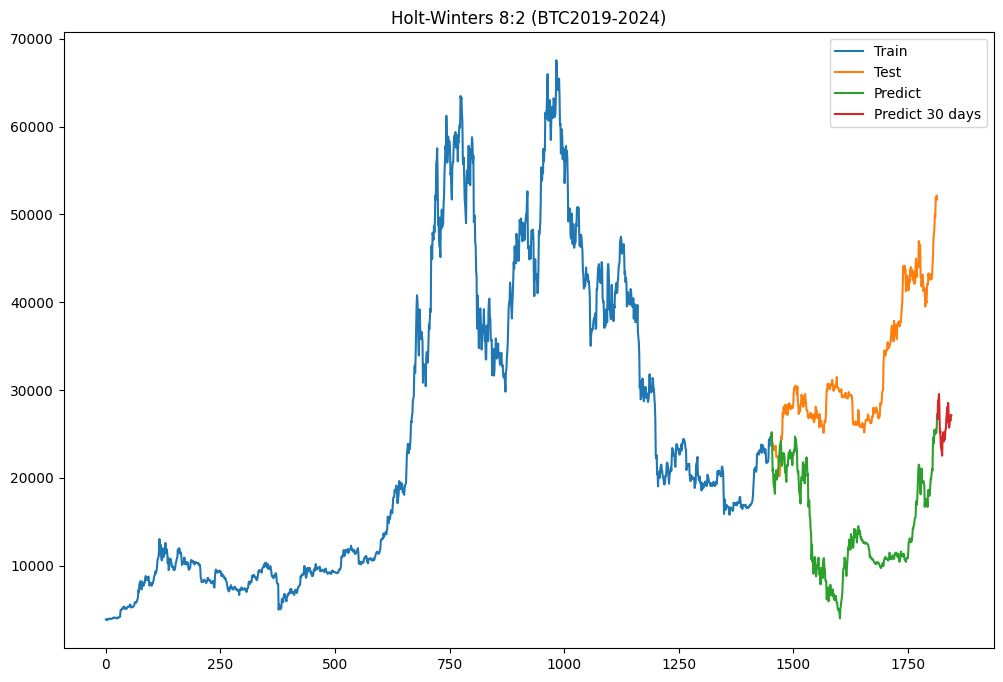

In [9]:
# Trực quan hóa kết quả
plt.figure(figsize=(12, 8))
plt.title('Holt-Winters 8:2 (BTC2019-2024)')
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(predict_test.index, predict_test, label='Predict')
plt.plot(predict_30_days.index, predict_30_days, label='Predict 30 days')
plt.legend(loc='best')
plt.show()

#### Dự báo 60 ngày

In [10]:
# Dự báo cho 60 ngày tiếp theo
predict_60_days = model.predict(start=test.index[-1] + 1, end=test.index[-1] + 1 + 60)
print(predict_60_days)

1815    26716.046606
1816    28765.725234
1817    28869.195347
1818    29536.349820
1819    27959.131353
            ...     
1871    28722.202551
1872    28027.534163
1873    27512.238567
1874    25298.176950
1875    24955.580264
Length: 61, dtype: float64


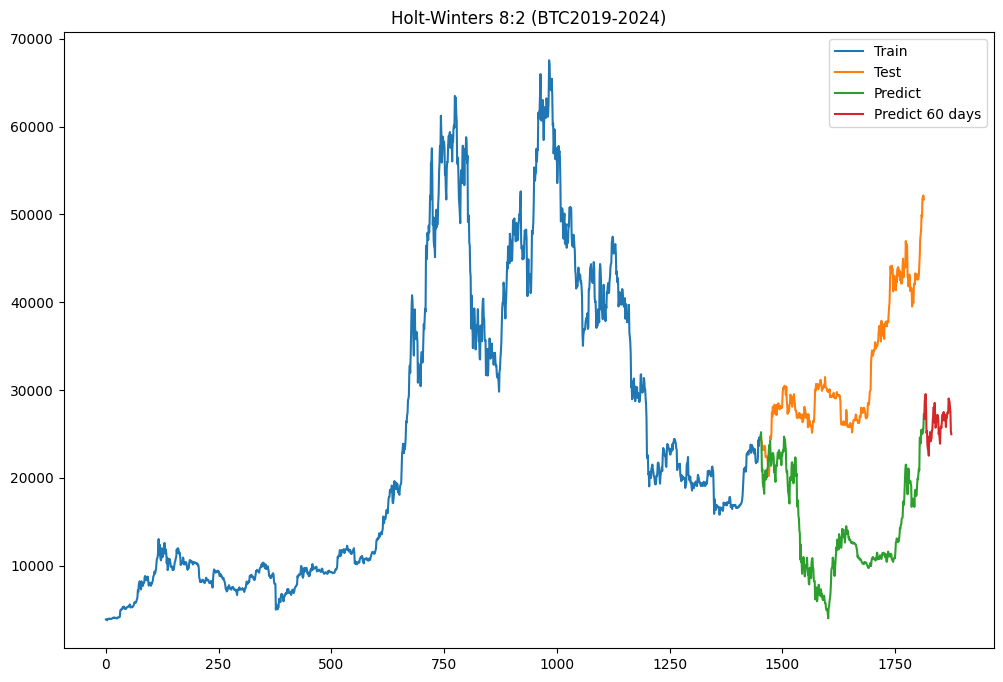

In [11]:
# Trực quan hóa kết quả
plt.figure(figsize=(12, 8))
plt.title('Holt-Winters 8:2 (BTC2019-2024)')
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(predict_test.index, predict_test, label='Predict')
plt.plot(predict_60_days.index, predict_60_days, label='Predict 60 days')
plt.legend(loc='best')
plt.show()

#### Dự báo 90 ngày

In [12]:
# Dự báo cho 60 ngày tiếp theo
predict_90_days = model.predict(start=test.index[-1] + 1, end=test.index[-1] + 1 + 90)
print(predict_90_days)

1815    26716.046606
1816    28765.725234
1817    28869.195347
1818    29536.349820
1819    27959.131353
            ...     
1901    19934.684135
1902    19740.283788
1903    18364.880301
1904    18019.666405
1905    15008.740442
Length: 91, dtype: float64


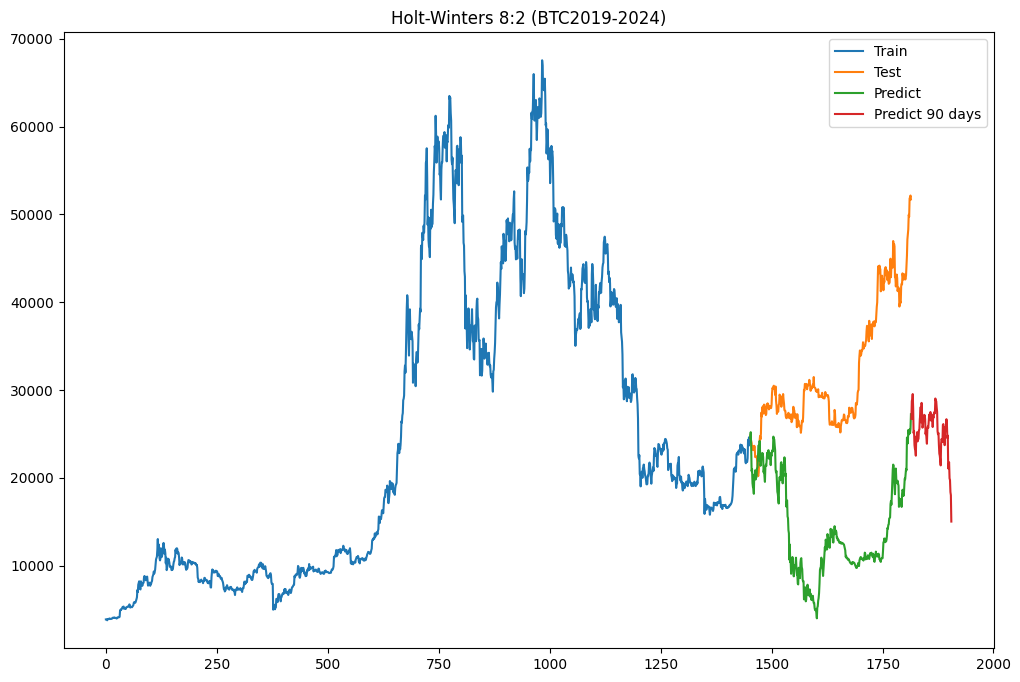

In [13]:
# Trực quan hóa kết quả
plt.figure(figsize=(12, 8))
plt.title('Holt-Winters 8:2 (BTC2019-2024)')
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(predict_test.index, predict_test, label='Predict')
plt.plot(predict_90_days.index, predict_90_days, label='Predict 90 days')
plt.legend(loc='best')
plt.show()

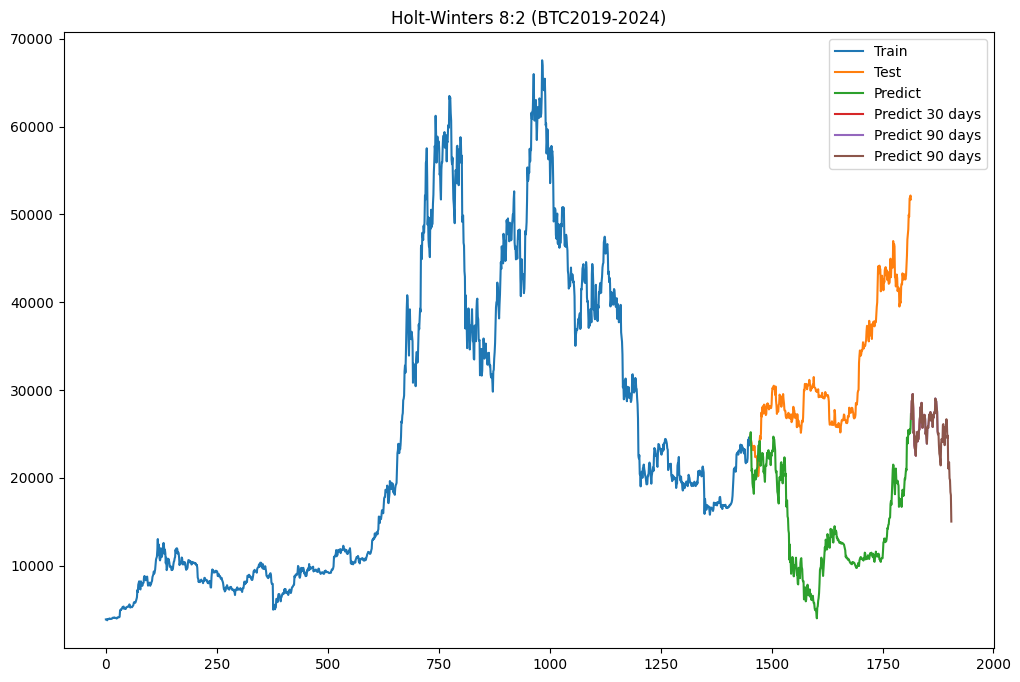

In [15]:
# Trực quan hóa kết quả
plt.figure(figsize=(12, 8))
plt.title('Holt-Winters 8:2 (BTC2019-2024)')
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(predict_test.index, predict_test, label='Predict')
plt.plot(predict_30_days.index, predict_30_days, label='Predict 30 days')
plt.plot(predict_60_days.index, predict_60_days, label='Predict 90 days')
plt.plot(predict_90_days.index, predict_90_days, label='Predict 90 days')
plt.legend(loc='best')
plt.show()